### Reading file riket2023_åk9_np.xlsx and the sheets for the different subjects


In [15]:
# 0a)
import pandas as pd

# Read all sheets, skipping the first 8 rows
all_sheets = pd.read_excel("riket2023_åk9_np.xlsx", skiprows=8, sheet_name=None)     

# Extract individual DataFrames for each sheet 
english = all_sheets["Engelska"]
mathematics = all_sheets["Matematik"]
swedish = all_sheets["Svenska"]
swedish_second = all_sheets["Svenska som andraspråk"]

### Renaming columns 

In [3]:
# 0a)
# Function for renaming columns 
def rename_columns(df):
    # Define a list of new column names 
    new_columns = [
        'Plats',  
        'Huvudman',  
        'Totalt (A-F)',  
        'Flickor (A-F)',  
        'Pojkar (A-F)',  
        'Totalt (A-E)',  
        'Flickor (A-E)',  
        'Pojkar (A-E)',  
        'Totalt (poäng)',  
        'Flickor (poäng)', 
        'Pojkar (poäng)'
    ]
    
    # Rename the columns of the DataFrame using the list of new column names
    df.columns = new_columns
     # Filter out rows with Huvudman "Skolverket" only for the DataFrame for Swedish as second language
    if df is swedish_second and "Skolverket" in df["Huvudman"].values:
        df = df[df["Huvudman"] != "Skolverket"]
    # Return the DataFrame with updated column names
    return df

# Use the function to rename columns for each DataFrame
english = rename_columns(english)
mathematics = rename_columns(mathematics)
swedish = rename_columns(swedish)
swedish_second = rename_columns(swedish_second)


### Number of students who received the grade F

In [4]:
# 0b)
# Extract number of girls with grades A-F
girls_A_to_F = mathematics.loc[0, "Flickor (A-F)"]
#Extract the percentage of girls with grades A-E and convert to a decimal
girls_A_to_E = mathematics.loc[0, "Flickor (A-E)"] / 100  
# Calculate number of girls with F by subtracting the percentage of girls with grades A to E from 1 and multiplying by the total number of girls with grades A to F
girls_F = girls_A_to_F * (1 - girls_A_to_E)
rounded_girls_F =round(girls_F)

print("Antal flickor som fått betyget F:", rounded_girls_F)

# Extract number of girls with grades A-F
boys_A_to_F = mathematics.loc[0, "Pojkar (A-F)"]
#Extract the percentage of boys with grades A-E and convert to a decimal
boys_A_to_E = mathematics.loc[0, "Pojkar (A-E)"] / 100
# Calculate number of boys with F by subtracting the percentage of boys with grades A to E from 1 and multiplying by the total number of boys with grades A to F
boys_F = boys_A_to_F * (1 - boys_A_to_E)
rounded_boys_F =round(boys_F)

print("Antal pojkar som fått betyget F:", rounded_boys_F)

Antal flickor som fått betyget F: 5825
Antal pojkar som fått betyget F: 5798


### Bar chart of total points per subject 

C:\Users\annah\AppData\Local\Temp\ipykernel_14044\4283920881.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")])


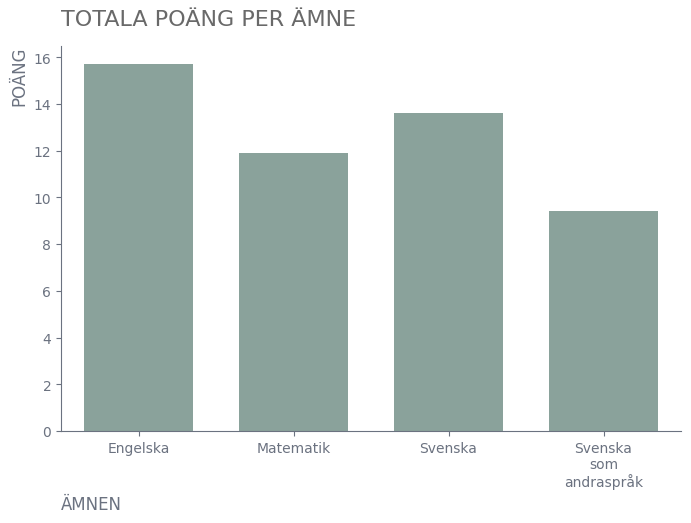

In [5]:
# 0c)
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()

# Define subjects
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
# List of points
points = [english.loc[0, "Totalt (poäng)"], 
          mathematics.loc[0, "Totalt (poäng)"], 
          swedish.loc[0, "Totalt (poäng)"], 
          swedish_second.loc[0, "Totalt (poäng)"]]

# Create figure and axis objects
fig, ax = plt.subplots()
# Create a bar plot
sns.barplot(x=subjects, y=points, color="#86A69D",width = 0.7, ax=ax) 
# Set x-axis tick labels with a line break for the last subject 
ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")]) 
#Set x-axis label
plt.xlabel("ÄMNEN", loc="left", color="#6b7280", fontsize=12)
# Set y-axis label
plt.ylabel("POÄNG", loc="top", color="#6b7280", fontsize=12)
# Set title
plt.title("TOTALA POÄNG PER ÄMNE",  loc="left", pad=15, color="dimgray", fontsize=16) 
#Remove and change lines
ax.tick_params(axis="both", colors="#6b7280")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#6b7280")
ax.spines["bottom"].set_color("#6b7280")

fig.set_size_inches(8, 5)

plt.show()

C:\Users\annah\AppData\Local\Temp\ipykernel_14044\3920151340.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")])
C:\Users\annah\AppData\Local\Temp\ipykernel_14044\3920151340.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")])
C:\Users\annah\AppData\Local\Temp\ipykernel_14044\3920151340.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")])
C:\Users\annah\AppData\Local\Temp\ipykernel_14044\3920151340.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


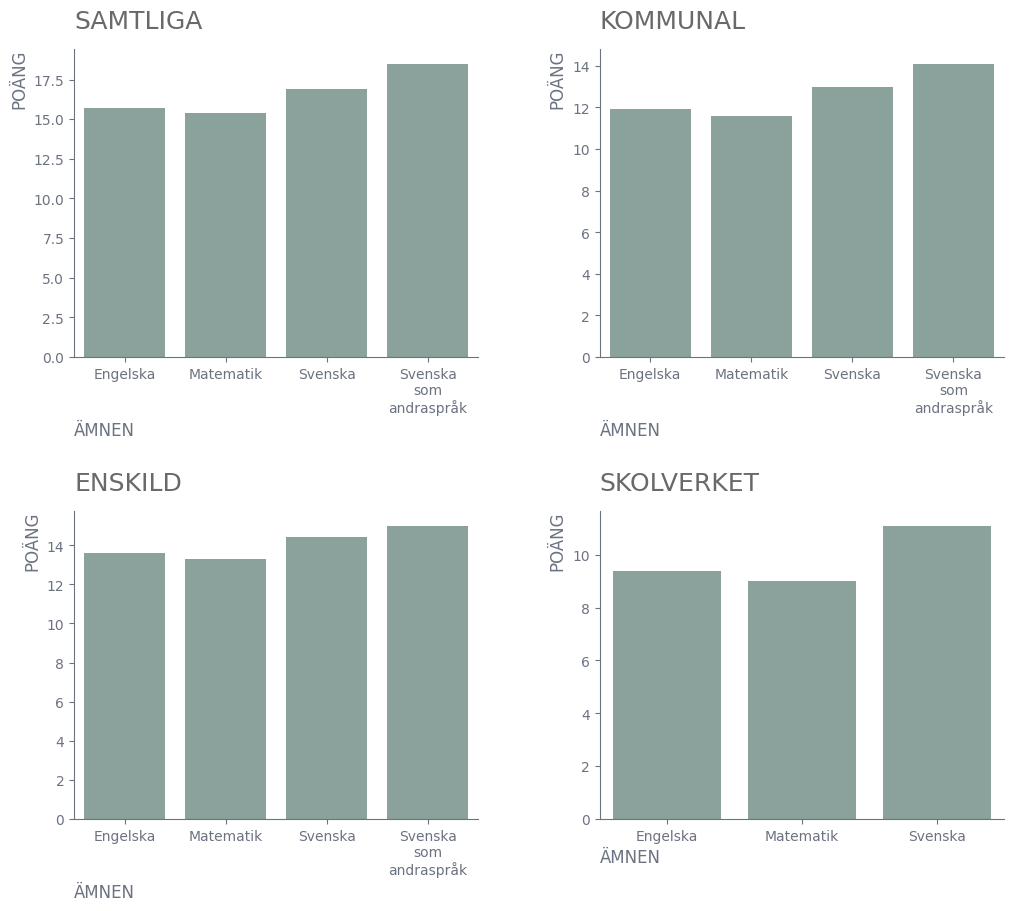

In [6]:
sns.reset_defaults()
# Define subjects
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
# Define dataframes 
dataframes = [english, mathematics, swedish, swedish_second]
# Define titles 
titles = ["SAMTLIGA", "KOMMUNAL", "ENSKILD", "SKOLVERKET"]

def plot(dataframes, titles):
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Iterate over each subplot along with its corresponding dataframe and title
    for ax, df, title in zip(axes.flatten(), dataframes, titles):
        # Extract points for each subject
        points = [df.loc[i, "Totalt (poäng)"] for i in range(len(df))]
        # Create bar plot
        sns.barplot(x=subjects[:len(points)], y=points, color="#86A69D", ax=ax)
        # Set x-axis tick labels with a line break for the last subject
        ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")]) 
        ax.set_xlabel("ÄMNEN", loc="left", color="#6b7280", fontsize=12)
        ax.set_ylabel("POÄNG", loc="top", color="#6b7280", fontsize=12)
        ax.set_title(title, loc="left", pad=15, color="dimgray", fontsize=18)
        ax.tick_params(axis="both", colors="#6b7280")
        # Remove top and right borders
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#6b7280")
        ax.spines["bottom"].set_color("#6b7280")

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    plt.show()
# Call funktion 
plot(dataframes, titles)


### a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,flickor och pojkar i samma graf.


In [16]:
import plotly_express as px

sheet = "Tabell 1B"
df = pd.read_excel("betyg_o_prov_riksnivå.xlsx", skiprows=7, sheet_name=sheet)

df

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3
